# LESSON 1: CLASSIFICATION METRICS 🌸
*Learning to grade your flower expert AI*

## What You'll Learn
By the end of this notebook, you'll understand:
- **Accuracy** - The most basic metric (but watch out for its trap!)
- **Precision** - "When I say it's a rose, am I lying?"
- **Recall** - "Did I find all the roses?"
- **F1-Score** - The holy grail single metric
- **Confusion Matrix** - WHERE DID IT MESS UP? (The detective's favorite tool)

## Real Talk
Classification is like sorting M&Ms by color. Your model looks at features (measurements) and puts stuff into buckets (classes). We need to know: **how badly is it screwing up?**

Let's find out! 🚀

In [43]:
# Install required packages (run this first!)
import subprocess
import sys

packages = ['seaborn', 'scikit-learn', 'matplotlib', 'numpy']
print("Checking/installing packages...")
for package in packages:
    try:
        __import__(package.replace('-', '_'))
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
print("✓ All packages ready!\n")

# Setup
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')  # Suppress emoji font warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Make plots look nice
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("🌟 Classification Evaluation Notebook Loaded!")
print("This notebook will teach you evaluation metrics step by step.")

Checking/installing packages...
Installing scikit-learn...
✓ All packages ready!

🌟 Classification Evaluation Notebook Loaded!
This notebook will teach you evaluation metrics step by step.


## 📚 Step 1: Load Data & Train Model

**The Setup:** We're teaching a computer to be a flower expert. We have 3 types of iris flowers, and we measure 4 things about each flower (petal width, sepal length, etc.).

**The Goal:** Can the computer learn to identify flowers like a botanist?

**What's "stratify"?** When we split the data, `stratify=y` ensures we keep the same ratio of flower types in both training and test sets. (If we have 33% of each flower type in the full dataset, we want 33% of each in train AND test!)

Let's find out...

In [44]:
print("🌸 WHAT WE'RE DOING:")
print("We're teaching a computer to recognize iris flowers (like a flower expert!)")
print("Then we'll test how good our teaching was using different metrics.")
print()

# Load iris dataset (3 flower types)
iris = load_iris()
X, y = iris.data, iris.target

print(f"Dataset: {len(X)} flowers with {X.shape[1]} measurements each")
print(f"Flower types: {', '.join(iris.target_names)}")
print(f"Class distribution: {np.bincount(y)}")

# Show one example
print(f"\nExample flower measurements:")
print(f"Sepal length: {X[0][0]:.1f} cm")
print(f"Petal width:  {X[0][3]:.1f} cm")
print(f"This flower is: {iris.target_names[y[0]]}")

print("\n📚 TRAIN-TEST SPLIT:")
print("Training data = Flowers the computer studies (like flashcards)")
print("Test data = Flowers we quiz the computer on (exam questions)")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining samples: {len(X_train)} (flashcards)")
print(f"Test samples: {len(X_test)} (exam questions)")

# Train simple model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

print("\n✅ Model training complete!")
print("Now let's see how well it did...")

🌸 WHAT WE'RE DOING:
We're teaching a computer to recognize iris flowers (like a flower expert!)
Then we'll test how good our teaching was using different metrics.

Dataset: 150 flowers with 4 measurements each
Flower types: setosa, versicolor, virginica
Class distribution: [50 50 50]

Example flower measurements:
Sepal length: 5.1 cm
Petal width:  0.2 cm
This flower is: setosa

📚 TRAIN-TEST SPLIT:
Training data = Flowers the computer studies (like flashcards)
Test data = Flowers we quiz the computer on (exam questions)

Training samples: 105 (flashcards)
Test samples: 45 (exam questions)

✅ Model training complete!
Now let's see how well it did...


## 📊 Step 2: Metric #1 - ACCURACY 🎯
*The most obvious metric (but also the most dangerous)*

### What is it?
**Accuracy** = How many did you get right out of all predictions?

Formula: `Accuracy = Correct Predictions / Total Predictions`

### The Metaphor
Imagine you're grading a test. Accuracy is just: "What percentage did the student get right?"

Simple! But here's the trap... (we'll see it at the end 😏)

In [45]:
print("🎯 ACCURACY - The simplest way to measure performance")
print("Formula: Accuracy = (Correct predictions) / (Total predictions)")
print()

accuracy = accuracy_score(y_test, y_pred)
correct = (y_pred == y_test).sum()
total = len(y_test)

print(f"Model made {total} predictions")
print(f"Correct predictions: {correct}")
print(f"Wrong predictions: {total - correct}")
print(f"\nACCURACY: {accuracy:.1%} ({correct}/{total})")

# Show some examples
print(f"\n📋 Sample predictions:")
for i in range(3):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[y_pred[i]]
    status = "✅ Correct" if y_pred[i] == y_test[i] else "❌ Wrong"
    print(f"Flower {i+1}: Actual={actual}, Predicted={predicted} → {status}")

🎯 ACCURACY - The simplest way to measure performance
Formula: Accuracy = (Correct predictions) / (Total predictions)

Model made 45 predictions
Correct predictions: 44
Wrong predictions: 1

ACCURACY: 97.8% (44/45)

📋 Sample predictions:
Flower 1: Actual=virginica, Predicted=virginica → ✅ Correct
Flower 2: Actual=versicolor, Predicted=versicolor → ✅ Correct
Flower 3: Actual=virginica, Predicted=virginica → ✅ Correct


## 📊 Step 3: Metrics #2-4 - PRECISION, RECALL, F1 🎭
*The power trio that accuracy wishes it could be*

### First: Understanding True/False Positives
Before we dive in, quick definitions:
- **True Positive (TP)**: Model said "positive" and it WAS positive ✅
- **False Positive (FP)**: Model said "positive" but it was actually negative ❌ (false alarm!)
- **True Negative (TN)**: Model said "negative" and it WAS negative ✅
- **False Negative (FN)**: Model said "negative" but it was actually positive ❌ (missed it!)

Now the metrics make sense...

---

### Precision: "Am I a liar?"
**Precision** = When I predict "setosa", how often am I actually right?

**Metaphor:** You're a metal detector. Every time you beep, how often is it actually treasure vs trash?
- High precision = You rarely beep for bottle caps
- Low precision = You beep for everything, mostly garbage

Formula: `Precision = True Positives / (True Positives + False Positives)`

---

### Recall: "Am I blind?"
**Recall** = Of all the actual setosas out there, how many did I find?

**Metaphor:** You're looking for your keys. Recall is: "Of all the places your keys could be, how many did you actually check?"
- High recall = You searched everywhere, found the keys
- Low recall = You gave up after checking 2 spots

Formula: `Recall = True Positives / (True Positives + False Negatives)`

---

### F1-Score: The Peacemaker
**F1** = The **harmonic mean** of precision and recall (a balanced score)

**What's harmonic mean?** It's a special type of average that punishes extreme imbalance.

**Why not just average them normally?** Look at this example:

| Scenario | Precision | Recall | Normal Average | Harmonic Mean (F1) |
|----------|-----------|--------|----------------|---------------------|
| Balanced | 90% | 90% | 90% | 90% |
| Imbalanced | 100% | 10% | 55% | **18%** |

See? Normal average says 55% (seems okay!), but harmonic mean correctly shows it's trash (18%)!

Formula: `F1 = 2 × (Precision × Recall) / (Precision + Recall)`

**When to use:**
- Precision matters: Spam detection (don't delete real emails!)
- Recall matters: Cancer detection (don't miss ANY tumors!)
- F1 matters: Most other cases (balanced is usually what you want)

In [46]:
print("🎯 PRECISION - 'When I predict setosa, how often am I right?'")
print()

# Calculate for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Precision by flower type:")
for i, class_name in enumerate(iris.target_names):
    print(f"{class_name}: {precision[i]:.1%}")
    print(f"  → Of all flowers I predicted as {class_name}, {precision[i]:.1%} were actually {class_name}")

print("\n🎯 RECALL - 'Of all the actual setosas, how many did I find?'")
print()

print("Recall by flower type:")
for i, class_name in enumerate(iris.target_names):
    print(f"{class_name}: {recall[i]:.1%}")
    print(f"  → Of all actual {class_name} flowers, I found {recall[i]:.1%} of them")

print("\n🎭 F1-SCORE - Balance between precision and recall")
print("Formula: F1 = 2 × (Precision × Recall) / (Precision + Recall)")
print()

print("F1-Score by flower type:")
for i, class_name in enumerate(iris.target_names):
    print(f"{class_name}: {f1[i]:.1%} (balanced score)")

# Overall averages
print("\n" + "="*60)
print("OVERALL AVERAGES:")
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision_weighted:.1%}")
print(f"Recall:    {recall_weighted:.1%}")
print(f"F1-Score:  {f1_weighted:.1%}")
print(f"\nMacro Avg F1:    {f1_score(y_test, y_pred, average='macro'):.1%} (treat all classes equally)")
print(f"Weighted Avg F1: {f1_weighted:.1%} (weight by class size)")

🎯 PRECISION - 'When I predict setosa, how often am I right?'

Precision by flower type:
setosa: 100.0%
  → Of all flowers I predicted as setosa, 100.0% were actually setosa
versicolor: 100.0%
  → Of all flowers I predicted as versicolor, 100.0% were actually versicolor
virginica: 93.8%
  → Of all flowers I predicted as virginica, 93.8% were actually virginica

🎯 RECALL - 'Of all the actual setosas, how many did I find?'

Recall by flower type:
setosa: 100.0%
  → Of all actual setosa flowers, I found 100.0% of them
versicolor: 93.3%
  → Of all actual versicolor flowers, I found 93.3% of them
virginica: 100.0%
  → Of all actual virginica flowers, I found 100.0% of them

🎭 F1-SCORE - Balance between precision and recall
Formula: F1 = 2 × (Precision × Recall) / (Precision + Recall)

F1-Score by flower type:
setosa: 100.0% (balanced score)
versicolor: 96.6% (balanced score)
virginica: 96.8% (balanced score)

OVERALL AVERAGES:
Precision: 97.9%
Recall:    97.8%
F1-Score:  97.8%

Macro Avg F1:

### 🎯 CHALLENGE: Try It Yourself!

Want to see how model complexity affects metrics?

**Try this:** Go back to the model training cell and change `max_depth=3` to `max_depth=1` or `max_depth=5`
- Shallower tree (depth=1) = simpler model = might underfit
- Deeper tree (depth=5) = more complex model = might overfit

Re-run the cells and watch how precision, recall, and F1 change for each flower type!

**Question to think about:** Which metric changed the most? Why might that be?

## 📊 Step 4: Metric #5 - CONFUSION MATRIX 🔥
*WHERE DID IT MESS UP?*

### What is it?
The confusion matrix shows you **exactly** which classes your model is confusing with each other.

**Real talk:** Yeah, this matrix is confusing at first, but once you get it, it's your best debugging tool.

### How to Read It
- **Rows** = Actual truth (what it really is)
- **Columns** = What your model predicted
- **Diagonal** (top-left to bottom-right) = Correct predictions ✅
- **Off-diagonal** = Mistakes ❌

### 🧠 THE TRICK TO READING IT:
**Just match the two of the same name together (Y-axis and X-axis):**

- If the cell is **DARK BLUE**? 🔵 **Your model is GOOD!** (correct predictions)
- If the cell is **LIGHT/WHITE**? ⚪ **Your model is struggling!** (mistakes happening here)

**How to analyze:** Look at row "Actual setosa" and column "Predicted setosa" → that intersection should be DARK BLUE (means model correctly predicted setosa). If it's light/white? Your model can't recognize that flower type properly.

Let's see ours and analyze it!

🔥 CONFUSION MATRIX - Shows exactly where mistakes happen



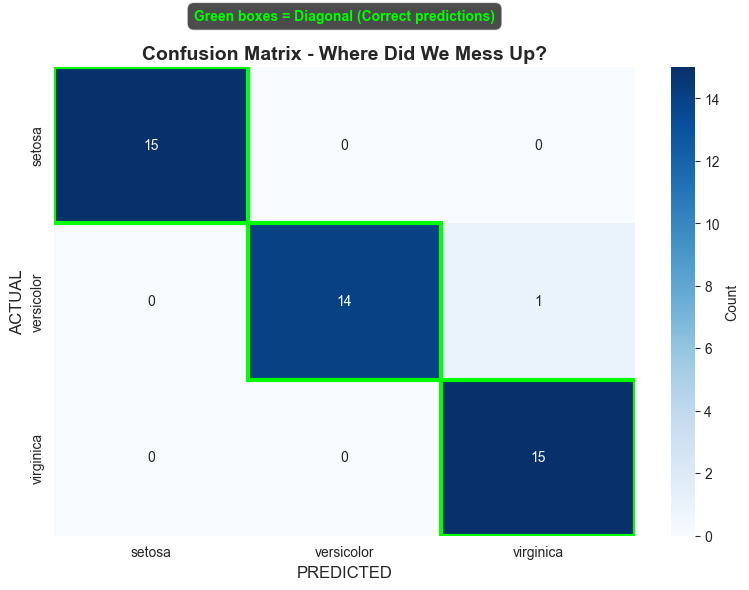


🧠 ANALYZING OUR MATRIX:

🔵 DARK BLUE CELLS (Matching names - GOOD!):
  • Setosa (Actual) → Setosa (Predicted): 15
    💪 CRUSHING IT! Model knows setosa flowers!
  • Versicolor (Actual) → Versicolor (Predicted): 14
    💪 CRUSHING IT! Model knows versicolor flowers!
  • Virginica (Actual) → Virginica (Predicted): 15
    💪 CRUSHING IT! Model knows virginica flowers!

⚪ LIGHT/WHITE CELLS (Mistakes - Model struggling here!):
  ❌ Confused 1 versicolor as virginica
     → Model saw an actual versicolor but thought it was virginica 🤦

💡 KEY INSIGHT:
The darker the DIAGONAL = the better your model
The lighter everything else = the fewer mistakes

If you see big numbers OFF the diagonal? Your model is struggling with those classes


In [47]:
print("🔥 CONFUSION MATRIX - Shows exactly where mistakes happen")
print()

cm = confusion_matrix(y_test, y_pred)

# Plot it with visual guide
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Where Did We Mess Up?', fontsize=14, fontweight='bold')
plt.ylabel('ACTUAL', fontsize=12)
plt.xlabel('PREDICTED', fontsize=12)

# Add visual annotation pointing to diagonal - INSIDE the plot area
ax.add_patch(plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='lime', lw=3))
ax.add_patch(plt.Rectangle((1, 1), 1, 1, fill=False, edgecolor='lime', lw=3))
ax.add_patch(plt.Rectangle((2, 2), 1, 1, fill=False, edgecolor='lime', lw=3))

# Move text annotation ABOVE the plot instead of on the side
plt.text(1.5, -0.3, 'Green boxes = Diagonal (Correct predictions)', 
         fontsize=10, color='lime', weight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n🧠 ANALYZING OUR MATRIX:")
print("="*60)

# Analyze diagonal (correct predictions)
print("\n🔵 DARK BLUE CELLS (Matching names - GOOD!):")
for i, class_name in enumerate(iris.target_names):
    count = cm[i, i]
    print(f"  • {class_name.capitalize()} (Actual) → {class_name.capitalize()} (Predicted): {count}")
    if count >= 14:
        print(f"    💪 CRUSHING IT! Model knows {class_name} flowers!")
    elif count >= 10:
        print(f"    👍 Pretty good! Model recognizes {class_name} most of the time")
    else:
        print(f"    😐 Meh... model struggling with {class_name}")

# Analyze off-diagonal (mistakes)
print("\n⚪ LIGHT/WHITE CELLS (Mistakes - Model struggling here!):")
mistakes_found = False
for i, actual_class in enumerate(iris.target_names):
    for j, pred_class in enumerate(iris.target_names):
        if i != j and cm[i, j] > 0:
            print(f"  ❌ Confused {cm[i, j]} {actual_class} as {pred_class}")
            print(f"     → Model saw an actual {actual_class} but thought it was {pred_class} 🤦")
            mistakes_found = True

if not mistakes_found:
    print("  ✅ NO MISTAKES! All cells off the diagonal are 0!")
    print("     → Your model is PERFECT! (or you got lucky 😏)")

print("\n💡 KEY INSIGHT:")
print("The darker the DIAGONAL = the better your model")
print("The lighter everything else = the fewer mistakes")
print("\nIf you see big numbers OFF the diagonal? Your model is struggling with those classes")

## Full Classification Report
*All metrics in one place - sklearn's gift to humanity*

This report gives you precision, recall, and F1 for each class, plus overall averages.

**Pro tip:** This is what you screenshot and send to your boss when they ask "how good is the model?"

In [48]:
print("📋 COMPLETE CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("📚 What each column means:")
print("precision = When I predict this class, how often right?")
print("recall    = Of actual this class, how many did I find?")
print("f1-score  = Balance between precision and recall")
print("support   = Number of actual samples of this class")

print("\n" + "="*60)
print("KEY TAKEAWAYS:")
print(f"✓ Overall accuracy: {accuracy:.1%}")
print(f"✓ Best performing class: {iris.target_names[f1.argmax()]} (F1: {f1.max():.1%})")
print(f"✓ Worst performing class: {iris.target_names[f1.argmin()]} (F1: {f1.min():.1%})")

print(f"\n📊 YOUR MODEL SUMMARY:")
print(f"Accuracy:  {accuracy:.1%}")
print(f"Precision: {precision_weighted:.1%}")
print(f"Recall:    {recall_weighted:.1%}")
print(f"F1-Score:  {f1_weighted:.1%}")

📋 COMPLETE CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

📚 What each column means:
precision = When I predict this class, how often right?
recall    = Of actual this class, how many did I find?
f1-score  = Balance between precision and recall
support   = Number of actual samples of this class

KEY TAKEAWAYS:
✓ Overall accuracy: 97.8%
✓ Best performing class: setosa (F1: 100.0%)
✓ Worst performing class: versicolor (F1: 96.6%)

📊 YOUR MODEL SUMMARY:
Accuracy:  97.8%
Precision: 97.9%
Recall:    97.8%
F1-Score:  97.8%


## ⚠️ THE ACCURACY TRAP ⚠️
*Why accuracy lies to you on imbalanced data*

Remember when I said accuracy had a trap? Here it is.

### The Setup
Imagine you're building a fraud detector for credit cards. Out of 10,000 transactions:
- 9,900 are legit (99%)
- 100 are fraud (1%)

### The Trap
You build a "model" that just predicts EVERYTHING is legit (no fraud ever).

**What's your accuracy?** 99%! 🎉

**What's your recall for fraud?** 0%! You caught ZERO fraud! 💀

### The Lesson
**Accuracy is useless on imbalanced data.** When classes are imbalanced, use F1-score or look at precision/recall for the minority class.

Let's see this in action with real code...

In [49]:
print("⚠️ IMBALANCED DATA TRAP - Why accuracy can be misleading")
print("="*60)

# Create fake imbalanced data (99% class 0, 1% class 1)
from sklearn.dummy import DummyClassifier

# Simulate 1000 samples: 990 negative, 10 positive
y_imbalanced = np.array([0]*990 + [1]*10)
y_imbalanced_test = np.array([0]*99 + [1]*1)

# Dumb model that always predicts 0
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit([[0]]*1000, y_imbalanced)  # Dummy training
y_dummy_pred = dummy.predict([[0]]*100)

print(f"Dataset: 99% class 0, 1% class 1")
print(f"\nDumb model that ALWAYS predicts class 0:")
print(f"  Accuracy:  {accuracy_score(y_imbalanced_test, y_dummy_pred):.1%} 🎉 (looks great!)")
print(f"  Precision: {precision_score(y_imbalanced_test, y_dummy_pred, zero_division=0):.1%}")
print(f"  Recall:    {recall_score(y_imbalanced_test, y_dummy_pred):.1%} ⚠️ (missed ALL positives!)")
print(f"  F1-Score:  {f1_score(y_imbalanced_test, y_dummy_pred):.1%} (reveals it's trash)")

print("\n💡 This is why we use F1 on imbalanced data!")
print("Accuracy says 99%, but the model is USELESS!")

print("\n🧠 LESSON COMPLETE - KEY TAKEAWAYS:")
print("="*60)
print("1. ACCURACY = Overall correctness")
print("   ✓ Simple and intuitive")
print("   ✗ Can be misleading with imbalanced data")
print()
print("2. PRECISION = 'When I predict positive, how often right?'")
print("   ✓ Important when false positives are costly")
print()
print("3. RECALL = 'Of actual positives, how many did I find?'")
print("   ✓ Important when false negatives are costly")
print()
print("4. F1-SCORE = Balance between precision and recall")
print("   ✓ Good overall measure, single number to compare models")
print()
print("5. CONFUSION MATRIX = Shows exactly where mistakes happen")
print("   ✓ Essential for debugging and understanding your model")
print()
print("🎉 Great job learning classification evaluation!")
print("\n🚀 Next up: Lesson 2 - Regression Evaluation (predicting numbers!)")

⚠️ IMBALANCED DATA TRAP - Why accuracy can be misleading
Dataset: 99% class 0, 1% class 1

Dumb model that ALWAYS predicts class 0:
  Accuracy:  99.0% 🎉 (looks great!)
  Precision: 0.0%
  Recall:    0.0% ⚠️ (missed ALL positives!)
  F1-Score:  0.0% (reveals it's trash)

💡 This is why we use F1 on imbalanced data!
Accuracy says 99%, but the model is USELESS!

🧠 LESSON COMPLETE - KEY TAKEAWAYS:
1. ACCURACY = Overall correctness
   ✓ Simple and intuitive
   ✗ Can be misleading with imbalanced data

2. PRECISION = 'When I predict positive, how often right?'
   ✓ Important when false positives are costly

3. RECALL = 'Of actual positives, how many did I find?'
   ✓ Important when false negatives are costly

4. F1-SCORE = Balance between precision and recall
   ✓ Good overall measure, single number to compare models

5. CONFUSION MATRIX = Shows exactly where mistakes happen
   ✓ Essential for debugging and understanding your model

🎉 Great job learning classification evaluation!

🚀 Next up: 